In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
import itertools

C:\Users\ruoyu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ruoyu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# read in training data and test data
train_data = pd.read_csv('C:\school work\data mining\carinsurance_train.csv')
train_data.head(20)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


In [4]:
train_data.shape

(4000, 19)

trainning data has 4000 records and 19 features

deal with missing value in one time to avoid redoing this process when testing

In [5]:
train_data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

the number of missing values in the data. However, turns out we have to remove CarInsurance column in the dataset because we dont't need to fill it with missiong values.

In [6]:
# Fill missing job with none
train_data['Job'].fillna('None', inplace=True)
# Fill missing communication with none
train_data['Communication'].fillna('None',inplace=True)

In [7]:
# Fill missing outcome as not in previous campaign
train_data['DaysPassed'][train_data['DaysPassed']==-1].count()

3042

from above we can see that in  Dayspassed column there are 3799 values equal to -1. Also there are 3799 missing values in Outcome. From my understanding of the dataset, if Dayspassed =-1, that means there will not be any prev_attemps or Outcome.
so I will set the relative Outcome to 'no_prev'

In [8]:
df = train_data.iloc[:,13:16][train_data['DaysPassed']==-1]
df

,DaysPassed,PrevAttempts,Outcome
0,-1,0,NaN
1,-1,0,NaN
3,-1,0,NaN
4,-1,0,NaN
6,-1,0,NaN
7,-1,0,NaN
8,-1,0,NaN
9,-1,0,NaN
10,-1,0,NaN
11,-1,0,NaN


prove the found pattern is correct.

In [9]:
# Fill missing outcome as not in previous campaign
train_data.loc[train_data['DaysPassed']==-1,'Outcome']='NoPrev'

In [10]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NoPrev,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,None,26,may,5,-1,0,NoPrev,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NoPrev,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NoPrev,14:35:44,14:38:56,0


In [11]:
# Fill missing education with the most common education level by job type
train_data['Education'].value_counts()

# Create job-education level mode mapping
edu_mode=[]
job_types = train_data.Job.value_counts().index
for job in job_types:
    mode = train_data[train_data.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=train_data.Job.value_counts().index)

# Apply the mapping to missing eductaion obs
for j in job_types:
    train_data.loc[(train_data['Education'].isnull()) & (train_data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]
train_data['Education'].fillna('None',inplace=True)


In [12]:
train_data.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

since we habe dealt with the missing values, now we will try to find the correlation between variables

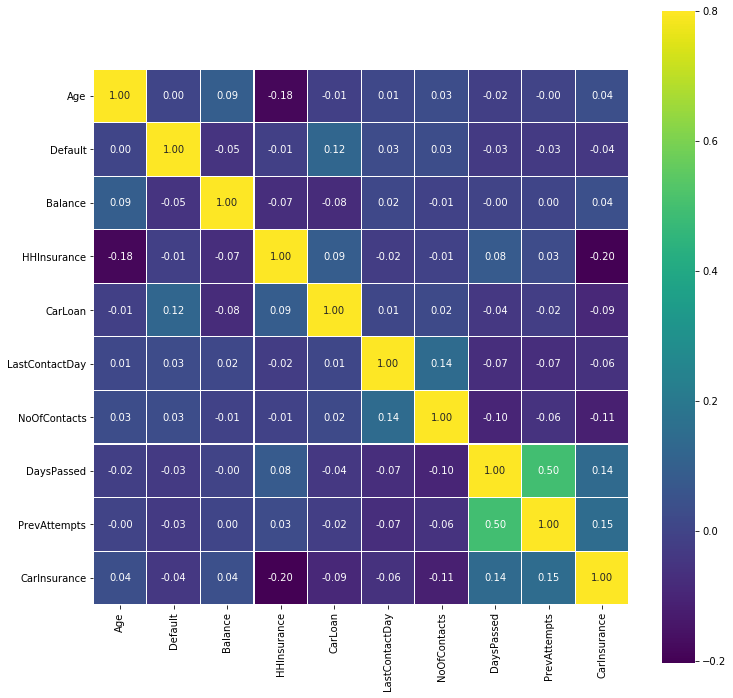

In [13]:
# First check out correlations among numeric features
# Heatmap is a useful tool to get a quick understanding of which variables are important
colormap = plt.cm.viridis
cor = train_data.corr()
cor = cor.drop(['Id'],axis=1).drop(['Id'],axis=0)
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

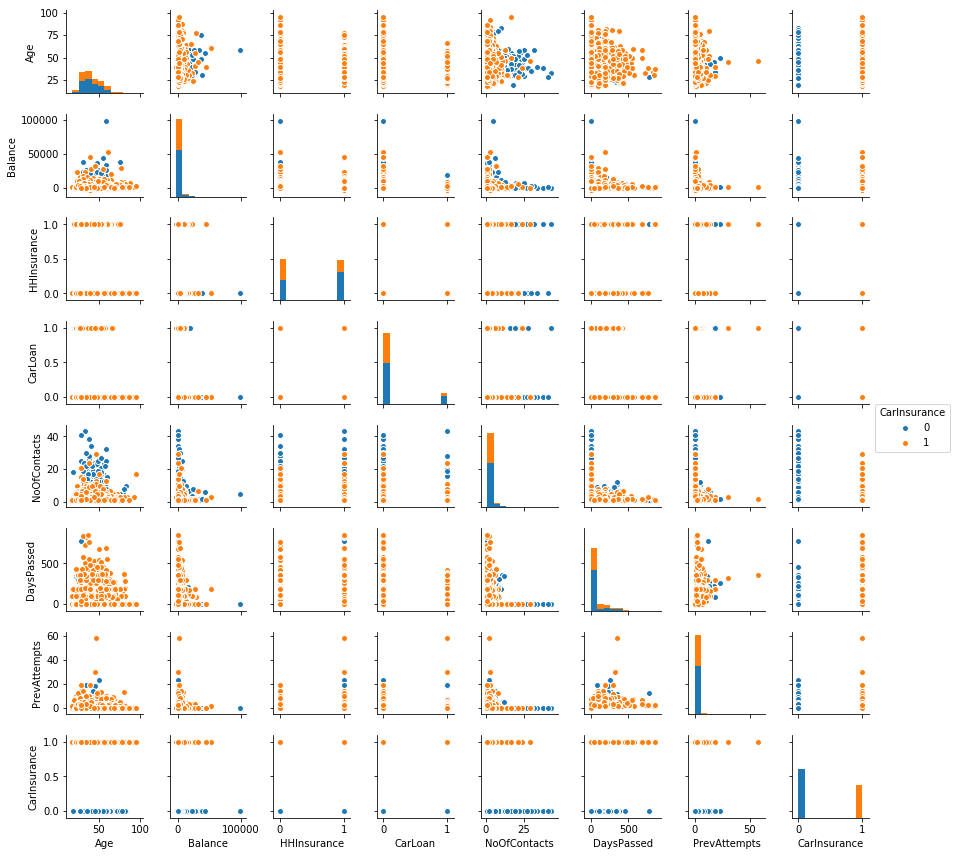

In [14]:
# Plotting paired fields of intrest using Seaborn pairplot
train_sub = ['Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(train_data[train_sub],hue='CarInsurance',size=1.5);

From the pair graph: older people are more likely to buy car insurance
                     too many calls to a customer will decrease the chance
                     more days passsed, less likely to buy

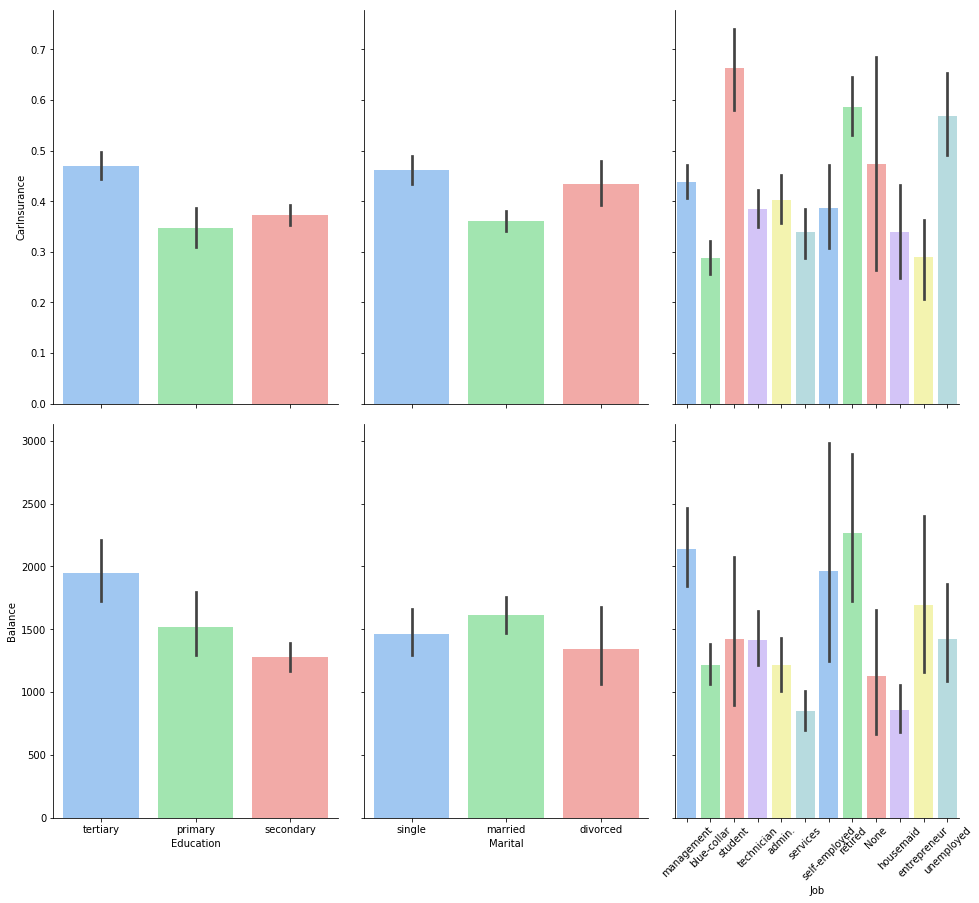

In [15]:
#Uses multiple x and y variables to form pair grid of categorical values passed
g = sns.PairGrid(train_data,
                 x_vars=["Education","Marital", "Job"],
                 y_vars=["CarInsurance", "Balance"],
                 aspect=.75, size=6)
plt.xticks(rotation=45)
g.map(sns.barplot, palette="pastel");

so from above people with higher education level and whose job status are students & retired are more likely to buy car insurance
among Martital status, single people tend to be more likely to buy car insurance

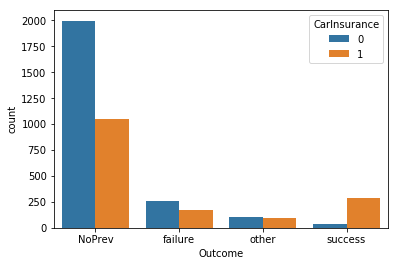

In [16]:
sns.countplot(data = train_data, x="Outcome",hue='CarInsurance');

no previous contact can be considered as a important attribute

Then we'll have to do feature engineering on the attributes. It is a crucial process when dealing with continuous variable like age and balance.

In [17]:
#use qcut to cut the continuous variables into bins of 5
train_data['AgeBinned'] = pd.qcut(train_data['Age'], 5 , labels = False)
train_data['BalanceBinned'] = pd.qcut(train_data['Balance'], 5,labels = False)
train_data.head(20)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,AgeBinned,BalanceBinned
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,jan,2,-1,0,NoPrev,13:45:20,13:46:30,0,1,3
1,2,32,blue-collar,married,primary,0,1156,1,0,None,...,may,5,-1,0,NoPrev,14:49:03,14:52:08,0,1,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,jun,1,119,1,failure,16:30:24,16:36:04,1,0,2
3,4,25,student,single,primary,0,373,1,0,cellular,...,may,2,-1,0,NoPrev,12:06:43,12:20:22,1,0,2
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,jun,1,-1,0,NoPrev,14:35:44,14:38:56,0,0,4
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,...,may,1,109,1,failure,14:58:08,15:11:24,1,1,3
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,...,mar,1,-1,0,NoPrev,13:00:02,13:03:17,1,2,3
7,8,35,management,divorced,tertiary,0,538,1,0,None,...,may,4,-1,0,NoPrev,15:39:43,15:40:49,0,1,2
8,9,30,admin.,married,secondary,0,187,1,0,cellular,...,nov,1,-1,0,NoPrev,12:20:56,12:22:42,0,0,1
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,...,may,2,-1,0,NoPrev,09:22:20,09:27:46,0,0,0


In [18]:
#Then deal with the call time use datatime package
#Converting CallStart and CallEnd to datetime datatype
train_data['CallStart'] = pd.to_datetime(train_data['CallStart'] )
train_data['CallEnd'] = pd.to_datetime(train_data['CallEnd'] )
#Subtracting both the Start and End times to arrive at the actual CallTime
train_data['CallTime'] = (train_data['CallEnd'] - train_data['CallStart']).dt.total_seconds()
#Binning the CallTime
train_data['CallTimeBinned'] = pd.qcut(train_data['CallTime'], 5,labels = False)

In [19]:
#drop original column and make a new dataframe to make models easier
train_data.drop(['Age','Balance','CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

In [20]:
# Using get_dummies function to assign binary values to each value in the categorical column
Job = pd.get_dummies(data = train_data['Job'],prefix = "Job")
Marital= pd.get_dummies(data = train_data['Marital'],prefix = "Marital")
Education= pd.get_dummies(data = train_data['Education'],prefix="Education")
Communication = pd.get_dummies(data = train_data['Communication'],prefix = "Communication")
LastContactMonth = pd.get_dummies(data = train_data['LastContactMonth'],prefix= "LastContactMonth")
Outcome = pd.get_dummies(data = train_data['Outcome'],prefix = "Outcome")

In [21]:
# Dropping the categorical columns which have been assigned dummies
train_data.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1,inplace=True)

#Concatenating the dataframe with the categorical dummy columns
df = pd.concat([train_data,Job,Marital,Education,Communication,LastContactMonth,Outcome],axis=1)

# The dataframe has some new additions resulting from the categorical dummies added
df.columns

Index(['Id', 'Default', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance',
       'AgeBinned', 'BalanceBinned', 'CallTimeBinned', 'Job_None',
       'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_None',
       'Communication_cellular', 'Communication_telephone',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep',
       'Outcome_NoPrev', 'Outcome_failure', 'Outc

In [22]:
df.drop(['Id'], axis=1, inplace=True)

Then we have to split the training set and test set, and drop the CarInsurance column

In [23]:
# Dropping the Target for X
X = df.drop(['CarInsurance'],axis=1).values
# Including only the Target for y
y = df['CarInsurance'].values
#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

Building predictive models and cross validation

In [24]:
#building confusion matrix based on the given code on 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names = ['Success','Failure']

kNN Accuracy is 0.75
Cross Validation Score = 0.75
             precision    recall  f1-score   support

          0       0.75      0.89      0.81       479
          1       0.77      0.55      0.64       321

avg / total       0.76      0.75      0.74       800

Confusion matrix, without normalization
[[427  52]
 [145 176]]


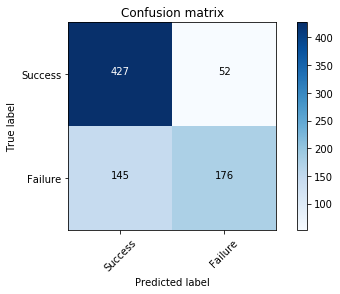

In [25]:
# Defining the kNNClassifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))
#The cross validation score is obtained for kNN using 10 folds
score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))
#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)
#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Normalized confusion matrix
[[ 0.8914405  0.1085595]
 [ 0.4517134  0.5482866]]


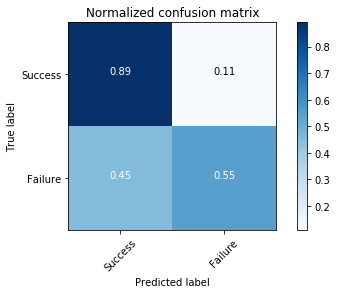

In [26]:
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Logistic Accuracy is 0.83
Cross Validation Score = 0.81
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       479
          1       0.80      0.78      0.79       321

avg / total       0.83      0.83      0.83       800

Confusion matrix, without normalization
[[415  64]
 [ 70 251]]


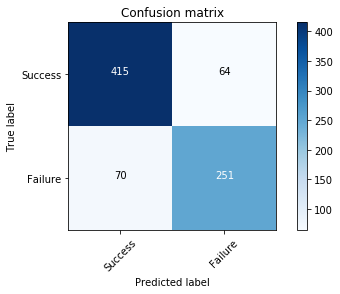

In [27]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Normalized confusion matrix
[[ 0.86638831  0.13361169]
 [ 0.21806854  0.78193146]]


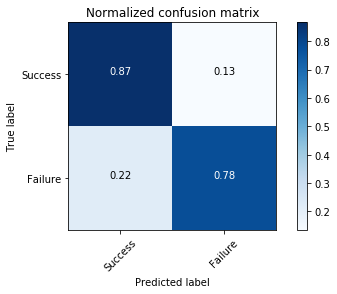

In [28]:
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

SVM Accuracy is 0.80
Cross Validation Score = 0.80
             precision    recall  f1-score   support

          0       0.84      0.82      0.83       479
          1       0.74      0.77      0.76       321

avg / total       0.80      0.80      0.80       800

Normalized confusion matrix
[[ 0.82045929  0.17954071]
 [ 0.2305296   0.7694704 ]]


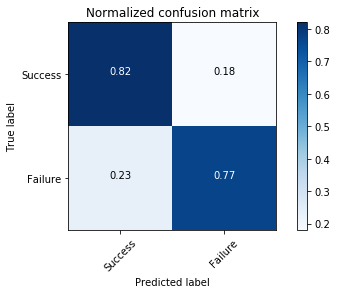

In [29]:
#SVM Classifier
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Decision Tree Accuracy is 0.81
Cross Validation Score = 0.81
             precision    recall  f1-score   support

          0       0.88      0.79      0.83       479
          1       0.73      0.83      0.78       321

avg / total       0.82      0.81      0.81       800

Normalized confusion matrix
[[ 0.78914405  0.21085595]
 [ 0.16510903  0.83489097]]


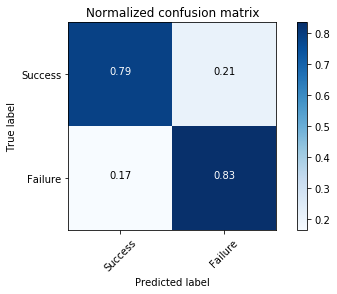

In [30]:
# Decision Tree Classifier
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Random Forest Accuracy is 0.85
Cross Validation Score = 0.84
             precision    recall  f1-score   support

          0       0.90      0.84      0.87       479
          1       0.79      0.86      0.82       321

avg / total       0.85      0.85      0.85       800

Normalized confusion matrix
[[ 0.8434238   0.1565762 ]
 [ 0.14330218  0.85669782]]


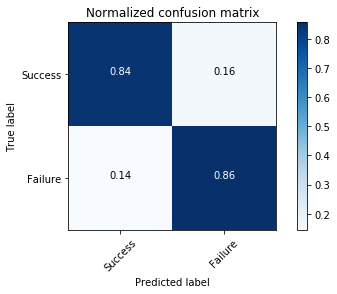

In [31]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

ROC curve validation

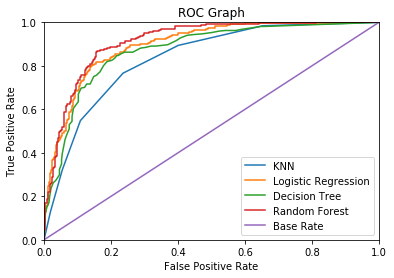

In [34]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
#Obtaining False Positive Rate, True Positive Rate and Threshold for all classifiers
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.plot(fpr, tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
# Plot Base Rate ROC
plt.plot([0,1],[0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

The curve is a good validator of the models and helps us determine whether our model works best. When the AOC( Area Under Curve) is maximum and when its towards the upper left then the model works best. As is shown in the graph, random forest has the best result.

possible advises:

1. Train the employees working in the Call Center with people skills so that during call they can be more friendly and engaging
2. Maintain a tracker which reminds of follow-ups so that the representative can talk to the person again and try to convince them in purchasing Car Insurance
3. Select people having good credit score and account balance so that the time invested in them is useful
4. Concentrate on Older People with age above 40 because compromising them for a new plan is easy as per the previous data
5. Contact persons from the previous campaign who responded since they are more likely to buy Insurance    